# Understanding the data


### Import dataset

In [165]:
#import dataset
import pandas as pd
df = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Copy of dataset for backup

In [166]:
# create a copy of dataset for backup
df1 = df.copy()
df1


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


### Dimensions of the dataset

In [167]:
#Identify the dimensions of the dataset by determining the number of rows and columns it contains.
df1.shape

(6969, 23)

### Data types of each column 

In [168]:
#Determine the data types of each column 
df1.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

### Unique values in each of column 

In [169]:
#Identify the number of unique values for each column 
df1.nunique()

Date              6003
Year               259
Type                12
Country            225
State              902
Location          4514
Activity          1587
Name              5683
Sex                  8
Age                243
Injury            4079
Unnamed: 11         12
Time               410
Species           1675
Source            5302
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

### Split to Categorical and Numerical 

In [170]:
categorical_data = df1[["Type", "Country", "State", "Location", "Activity", "Name", "Sex", "Injury", "Source"]]

numerical_data = df1[["Date", "Year", "Age", "Time"]]

### Explore Categorical Data

In [171]:
#basic statistics for categorical_data:
categorical_data.describe()

,Type,Country,State,Location,Activity,Name,Sex,Injury,Source
count,6926,6894,6462,6379,6358,6724,6365,6909,6925
unique,12,225,902,4514,1587,5683,8,4079,5302
top,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,FATAL,"K. McMurray, TrackingSharks.com"
freq,5107,2538,1178,191,1121,680,5578,863,131


In [172]:
#describe the unique values of each categorical column 
categorical_data.nunique()

Type          12
Country      225
State        902
Location    4514
Activity    1587
Name        5683
Sex            8
Injury      4079
Source      5302
dtype: int64

### Explore Numerical Data

In [173]:
#basic statistics for numerical_data:
numerical_data.describe()

,Year
count,6942.000000
mean,1934.403342
std,272.920956
min,0.000000
25%,1947.000000
50%,1985.000000
75%,2009.000000
max,2024.000000


In [174]:
#describe the unique values of each categorical column 
numerical_data.nunique()

Date    6003
Year     259
Age      243
Time     410
dtype: int64

# Data Cleaning

## Nan values Handling 

### Columns: drop the columns with NaN

In [175]:
# drop the columns with NaN
column_to_drop = ['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 11'] 
df1 = df1.drop(columns = column_to_drop) 

In [176]:
df1.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species ', 'Source'],
      dtype='object')

In [177]:
df1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rows: remove all the rows have no values 

In [178]:
# remove all the rows have no values 
df1 = df1.dropna(how='all') 
df1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6942,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN,"The Sun, 10/20/1938"


In [179]:
#Checking is we still have NaN columns
all_nan_rows = df1.isna().all(axis=1)
all_nan_rows

0       False
1       False
2       False
3       False
4       False
        ...  
6939    False
6940    False
6941    False
6942    False
6943    False
Length: 6944, dtype: bool

## Cols names Formating 

### Convert the columns names to lower case

In [180]:
#change the columns to lower case
df1.columns = df1.columns.str.lower() 
df1.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'time', 'species ', 'source'],
      dtype='object')

### Remove empty space  before and after column  names

In [181]:
df1.columns = df1.columns.str.strip()
df1.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'time', 'species', 'source'],
      dtype='object')

## "Date" Col Formatting

### Create and format date column

In [182]:
#edit date column
df1['date_cleaned'] = pd.to_datetime(df1['date'],errors='coerce',format = "%Y-%m-%d")
df1['date_cleaned'].value_counts()

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_80675/2361830467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_cleaned'] = pd.to_datetime(df1['date'],errors='coerce',format = "%Y-%m-%d")


Series([], Name: count, dtype: int64)

### Display 100 rows to check

In [183]:
#display 100 rows to check
pd.set_option('display.max_rows',50)
df1.sample(100)

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned
4796,19-Jan-1958,1958.0,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",16h30,6' shark,"V.M. Coppleson (1962), p.245",NaT
2701,30-Nov-1999,1999.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Surfing,Jeremiah Wyche,M,19,Lacerations to hand & wrist,15h30,NaN,"A. Brenneka, Shark Attack Survivors; The Palm ...",NaT
6742,Reported 30-Dec-1823,1823.0,Invalid,JAMAICA,NaN,NaN,NaN,male,NaN,NaN,Human remains found in shark,NaN,Shark involvement prior to death unconfirmed,NaN,NaT
246,30-Jul-2021,2021.0,Provoked,USA,Florida,"Ponce Inlet, Volusia County",Fishing,male,M,47,Hands bitten while attempting to unhook shark ...,11h00,NaN,"J. Marchand, GSAF",NaT
4140,25-Aug-1967,1967.0,Unprovoked,ITALY,Liguria,"Marinella Sarzana, La Spezia",Spearfishing on Scuba,Gian Paolo Porta Casucci,M,NaN,Minor injuries to face & forearm,NaN,NaN,"C. Moore, GSAF",NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,23-Nov-1992,1992.0,Unprovoked,USA,Florida,NaN,Surfing,Larry Bush,M,24,Right ankle bitten,13h00,1.8 m [6'] shark,"Fort Pierce Tribune, 11/24/1992 & 11/30/1992; ...",NaT
2878,25-Jan-1997,1997.0,Unprovoked,AUSTRALIA,Queensland,"Whitehaven Beach, Whitsundays Island",Snorkeling,Derek Burrows,M,27,"Left leg lacerated, punctures to right leg",11h00 / 11h30,1.8 m to 2.1 m [6' to 7'] shark,"Sunday Mail (QLD), 1/26/1997, p.2; Hobart Merc...",NaT
5901,16-Mar-1919,1919.0,Invalid,AUSTRALIA,New South Wales,Sydney Harbor,Cutter capsized,5 cadets from the Naval training ship Tingara,M,NaN,Shark involvement not confirmed,Late afternon,Shark involvement prior to death unconfirmed,"The Mercury, 3/18/1919",NaT
313,23-Jan-2021,2021.0,Unprovoked,AUSTRALIA,New South Wales,Lake Macquarie,Swimming,Rick Burbury,M,58,Severe lacerations to left arm,18h30,,"S. DeMarchi & B. Myatt, GSAF, K. McMurray, Tra...",NaT


### Convert the date to the right format with function

In [184]:
#function to convert the date to the right format
def parse_dates(date):
    for fmt in ("%d %b %Y", "%d-%b-%Y"):  
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  

df1['date'] = df1['date'].apply(parse_dates)
df1['date'].value_counts

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_80675/3172325793.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].apply(parse_dates)


<bound method IndexOpsMixin.value_counts of 0      2024-03-15
1      2024-03-04
2             NaT
3             NaT
4             NaT
          ...    
6939          NaT
6940          NaT
6941          NaT
6942          NaT
6943          NaT
Name: date, Length: 6944, dtype: datetime64[ns]>

## "Year" Col Formating 

### Extract year from date "dt.year"

In [185]:
# "dt.year" to extract year 
df1['year_cleaned']=df1['date_cleaned'].dt.year
df1.head()

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_80675/727078841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_cleaned']=df1['date_cleaned'].dt.year


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,2024-03-15,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,NaN
1,2024-03-04,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,NaN
2,NaT,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,NaN
3,NaT,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,NaN
4,NaT,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,NaN


### Format the datatype to int

In [186]:
#format the datatype for column "year", we remove all decimals, and a dot "."
df1['year_cleaned'] = df1['year_cleaned'].astype('Int64')
df1.head()

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_80675/566481419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_cleaned'] = df1['year_cleaned'].astype('Int64')


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,2024-03-15,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,<NA>
1,2024-03-04,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,<NA>
2,NaT,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,<NA>
3,NaT,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,<NA>
4,NaT,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,<NA>


### Drop old columns 'date', 'year'

In [187]:
#drop columns 'date', 'year'
df1 = df1.drop(columns=['date', 'year'])
df1.head()

,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,<NA>
1,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,<NA>
2,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,<NA>
3,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,<NA>
4,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,<NA>


In [188]:
df1

,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,<NA>
1,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,<NA>
2,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,<NA>
3,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,<NA>
4,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaT,<NA>
6940,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaT,<NA>
6941,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaT,<NA>
6942,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN,"The Sun, 10/20/1938",NaT,<NA>


### Drop rows with 'NaT' and 'NaN' in 'date_cleaned' and 'year_cleaned'

In [189]:
#drop rows with 'NaT' and 'NaN' in 'date_cleaned' and	'year_cleaned'
#df1 = df1.dropna(subset=['date_cleaned', 'year_cleaned'])
# Display the first few rows of the DataFrame

In [190]:
df1

,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,<NA>
1,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,<NA>
2,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,<NA>
3,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,<NA>
4,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaT,<NA>
6940,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaT,<NA>
6941,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaT,<NA>
6942,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN,"The Sun, 10/20/1938",NaT,<NA>


## "Type" Col Cleaning and Formating 

In [191]:
df1['type'].sort_values().value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Under investigation       1
Unverified                1
Name: count, dtype: int64

In [192]:
df1['type'] = df1['type'].str.replace(' Provoked', '', regex=False)
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
                          2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [193]:
df1['type'] = df1['type'].fillna('Unknown')
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
                          2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [194]:
df1['type'] = df1['type'].str.replace('?', 'Unknown ', regex=False)
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
                          2
Unknown                   1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [195]:
df1['type'] = df1['type'].replace('', 'Unknown')
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  20
Boat                      7
Unknown                   1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [196]:
df1['type'] = df1['type'].replace('SeaUnknownDisaster', 'Sea Disaster')
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  20
Boat                      7
Unknown                   1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [197]:
df1['type'] = df1['type'].replace('UnderUnknowninvestigation', 'Under investigation')
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  20
Boat                      7
Unknown                   1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

### Fill all missing values with 'Unknown'

In [198]:
df1['type'] = df1['type'].fillna('Unknown')
df1['type'].value_counts()

type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  20
Boat                      7
Unknown                   1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

## "Age" Col Formating 

In [199]:
df1["age"].value_counts()

age
19          89
16          89
17          88
17          85
15          84
            ..
84           1
36 & 26      1
77           1
Teens        1
13 or 14     1
Name: count, Length: 243, dtype: int64

### Convert values from str to integers

In [200]:
df1['age'] = pd.to_numeric(df1['age'], errors='coerce').astype('Int64')
df1["age"].value_counts()

age
17    173
18    157
15    155
20    152
19    150
     ... 
72      1
86      1
84      1
87      1
81      1
Name: count, Length: 81, dtype: Int64

In [201]:
df1['age'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
6939     True
6940     True
6941     True
6942     True
6943    False
Name: age, Length: 6944, dtype: bool

In [202]:
df1['age'].value_counts()

age
17    173
18    157
15    155
20    152
19    150
     ... 
72      1
86      1
84      1
87      1
81      1
Name: count, Length: 81, dtype: Int64

### Replace missing values with the mean

In [203]:
# Calculate the mean of the 'age' column
mean_age = int(df1['age'].mean())
mean_age


28

In [204]:
# Replace missing values with the mean
df1['age'].fillna(mean_age, inplace=True)
df1['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0       13
1       28
2       11
3       46
4       32
        ..
6939    28
6940    28
6941    28
6942    28
6943    15
Name: age, Length: 6944, dtype: Int64>

### Remove outliers: values > 100

In [205]:
# Keep only rows where 'age' is less than 100
df1 = df1[df1['age'] < 100]  

# Optionally, reset the index
df1.reset_index(drop=True, inplace=True)

## "Country" Col Formatting 

### Lower 

In [206]:
#Explore Country
df1['country'] = df1['country'].str.lower()
df1['country'].value_counts()

country
usa                               2538
australia                         1481
south africa                       598
new zealand                        145
papua new guinea                   136
                                  ... 
red sea / indian ocean               1
diego garcia                         1
admiralty islands                    1
federated states of micronesia       1
ceylon (sri lanka)                   1
Name: count, Length: 217, dtype: int64

### Remove empty spaces at the beginning

In [207]:
df1['country'] = df1['country'].str.lstrip()
df1['country'].value_counts()

country
usa                               2538
australia                         1481
south africa                       598
new zealand                        145
papua new guinea                   136
                                  ... 
red sea / indian ocean               1
diego garcia                         1
admiralty islands                    1
federated states of micronesia       1
ceylon (sri lanka)                   1
Name: count, Length: 215, dtype: int64

### Fill all missing values with 'Unknown'

In [208]:
df1['country'] = df1['country'].fillna('Unknown')
unknown_count = df1['country'].value_counts().get('Unknown', 0)
unknown_count

50

## "Location" Col Formatting

### Convert to lower case and remove empty spaces before and after

In [209]:
# Convert all values in the 'location' column to lower case and remove empty spaces before and after
df1['location'] = df1['location'].str.lower().str.strip()


### Fill all missing values with 'Unknown'

In [210]:
df1['location'] = df1['location'].fillna('Unknown')
unknown_count = df1['location'].value_counts().get('Unknown', 0)
unknown_count

565

## "Activity" Col Formatting

### Convert values to lower case and remove empty spaces before and after

In [211]:
# Convert all values in the 'location' column to lower case and remove empty spaces before and after
df1['activity'] = df1['activity'].str.lower().str.strip()
df1['activity'].value_counts()

activity
surfing                                              1126
swimming                                             1023
fishing                                               504
spearfishing                                          390
wading                                                174
                                                     ... 
wreck of the 1689-ton portuguese  coaster angoche       1
hookah diving (submerged)                               1
scuba diving & feeding fish                             1
free diving, collecting shells                          1
wreck of  large double sailing canoe                    1
Name: count, Length: 1528, dtype: int64

### Fill all missing values with 'Unknown'

In [212]:
df1['activity'] = df1['activity'].fillna('Unknown')
unknown_count = df1['activity'].value_counts().get('Unknown', 0)
unknown_count

586

## "Sex" Col Formatting

In [213]:
df1["sex"].value_counts()

sex
M        5578
F         779
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

### Replace/Format invalid values

In [218]:
df1['sex'] = df1['sex'].replace(["M ", " M","lli", "M x 2", "N", "."],"M" )
df1['sex'].value_counts()

sex
M          5586
F           779
Unknown     579
Name: count, dtype: int64

### Fill all missing values with 'Unknown'

In [222]:
df1['sex'] = df1['sex'].fillna('Unknown')
unknown_count = df1['sex'].value_counts().get('Unknown', 0)
unknown_count

579

# Save cleaned dataset 

In [228]:
df_cleaned = df1.copy()
df_cleaned.shape

(6944, 14)

# Insignts

## Total Number of attacks 

In [232]:
df_cleaned.shape

(6944, 14)

In [231]:

df_cleaned = df_cleaned.sort_values(by='year_cleaned')


,type,country,state,location,activity,name,sex,age,injury,time,species,source,date_cleaned,year_cleaned
0,Unprovoked,australia,Queensland,bargara beach,swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",NaT,<NA>
1,Unprovoked,usa,Hawaii,"old man's, waikiki",surfing,Matthew White,M,28,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaT,<NA>
2,Unprovoked,usa,Hawaii,"rainbows, oahu",swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaT,<NA>
3,Unprovoked,australia,Western Australia,"sandlnd island, jurian bay",Unknown,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",NaT,<NA>
4,Unprovoked,india,Maharashtra,"vaitarna river, palghar district",fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaT,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Unprovoked,australia,Western Australia,roebuck bay,diving,male,M,28,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaT,<NA>
6940,Unprovoked,australia,Western Australia,Unknown,pearl diving,Ahmun,M,28,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaT,<NA>
6941,Unprovoked,usa,North Carolina,ocracoke inlet,swimming,Coast Guard personnel,M,28,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaT,<NA>
6942,Unprovoked,panama,NaN,"panama bay 8ºn, 79ºw",Unknown,Jules Patterson,M,28,FATAL,NaN,NaN,"The Sun, 10/20/1938",NaT,<NA>


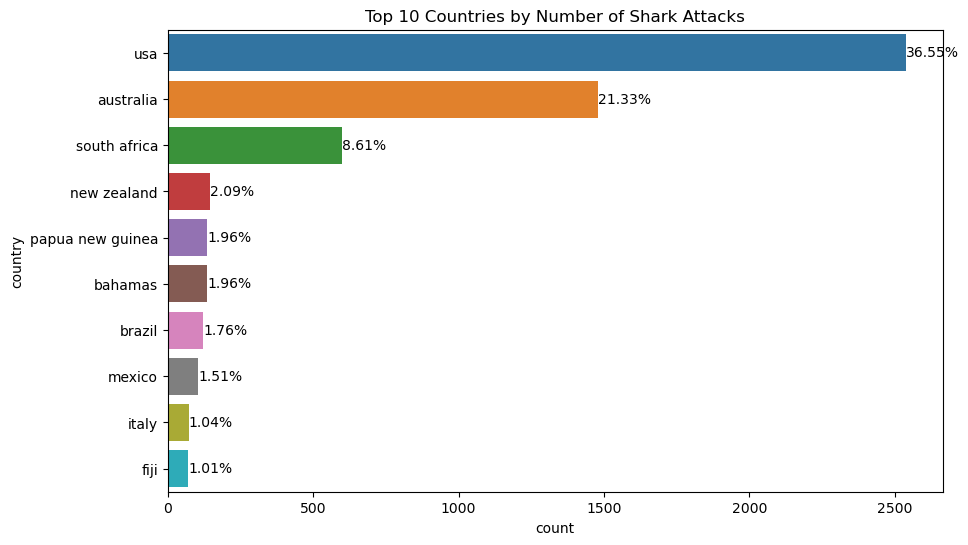

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame and 'country' is the column you want to visualize
top_10_countries = df_cleaned['country'].value_counts().nlargest(10)
sorted_countries = top_10_countries.index
total_attacks = df_cleaned['country'].value_counts().sum()

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned[df_cleaned['country'].isin(sorted_countries)], y='country', order=sorted_countries)
ax.set_title('Top 10 Countries by Number of Shark Attacks')

# Annotate each bar with percentage
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_attacks) * 100
    ax.annotate(f'{percentage:.2f}%', (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()